In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [39]:
data=pd.read_csv("bike_sales_india.csv")

In [40]:
data

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3


In [41]:
# Select only numerical data
numerical_data = data.select_dtypes(include=[np.number])

# Calculate standard deviation and variance
std_deviation = numerical_data.std()
variance = numerical_data.var()

# Display results
print("Standard Deviation:\n", std_deviation)
print("\nVariance:\n", variance)


Standard Deviation:
 Avg Daily Distance (km)        21.676985
Price (INR)                100753.660447
Year of Manufacture             2.907668
Engine Capacity (cc)          261.176292
Mileage (km/l)                 20.891728
Registration Year               2.748970
Resale Price (INR)          66613.220382
dtype: float64

Variance:
 Avg Daily Distance (km)    4.698917e+02
Price (INR)                1.015130e+10
Year of Manufacture        8.454535e+00
Engine Capacity (cc)       6.821306e+04
Mileage (km/l)             4.364643e+02
Registration Year          7.556838e+00
Resale Price (INR)         4.437321e+09
dtype: float64


Standard deviation and varience using formula

In [42]:
# Compute variance and standard deviation manually
def compute_variance_std(data):
    results = {}
    for col in data.columns:
        X = data[col].values
        mean_X = np.mean(X)
        variance = np.sum((X - mean_X) ** 2) / len(X)
        std_dev = np.sqrt(variance)
        results[col] = {"Variance": variance, "Standard Deviation": std_dev}
    return results

variance_std_results = compute_variance_std(numerical_data)
print("Variance and Standard Deviation:\n", variance_std_results)

Variance and Standard Deviation:
 {'Avg Daily Distance (km)': {'Variance': 469.8446970956161, 'Standard Deviation': 21.675901298345497}, 'Price (INR)': {'Variance': 10150284963.479937, 'Standard Deviation': 100748.62263812809}, 'Year of Manufacture': {'Variance': 8.45368975, 'Standard Deviation': 2.907522957776946}, 'Engine Capacity (cc)': {'Variance': 68206.23445791, 'Standard Deviation': 261.16323335781783}, 'Mileage (km/l)': {'Variance': 436.42066468652405, 'Standard Deviation': 20.89068368164441}, 'Registration Year': {'Variance': 7.556081989999999, 'Standard Deviation': 2.7488328414074217}, 'Resale Price (INR)': {'Variance': 4436877397.5890465, 'Standard Deviation': 66609.88963801882}}


In [43]:
# Calculate covariance and correlation
covariance = numerical_data.cov()
correlation = numerical_data.corr()

# Display results
print("\nCovariance Matrix:\n", covariance)
print("\nCorrelation Coefficient Matrix:\n", correlation)



Covariance Matrix:
                          Avg Daily Distance (km)   Price (INR)  \
Avg Daily Distance (km)               469.891686  2.647984e+04   
Price (INR)                         26479.840123  1.015130e+10   
Year of Manufacture                     1.223436 -7.705292e+02   
Engine Capacity (cc)                  -33.421875  2.351276e+04   
Mileage (km/l)                          4.403867  1.048154e+03   
Registration Year                       0.816901 -2.305858e+03   
Resale Price (INR)                   2180.199859  6.076700e+09   

                         Year of Manufacture  Engine Capacity (cc)  \
Avg Daily Distance (km)             1.223436            -33.421875   
Price (INR)                      -770.529238          23512.755591   
Year of Manufacture                 8.454535              9.086958   
Engine Capacity (cc)                9.086958          68213.055763   
Mileage (km/l)                      0.603414            -36.949387   
Registration Year             

covarience and corelation using formula

In [44]:
def compute_covariance_matrix(data):
    cols = data.columns
    n = len(cols)
    covariance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            X, Y = data[cols[i]].values, data[cols[j]].values
            mean_X, mean_Y = np.mean(X), np.mean(Y)
            covariance_matrix[i, j] = np.sum((X - mean_X) * (Y - mean_Y)) / len(X)

    return pd.DataFrame(covariance_matrix, index=cols, columns=cols)

covariance_matrix = compute_covariance_matrix(numerical_data)
print("Covariance Matrix:\n", covariance_matrix)

def compute_correlation_matrix(data):
    cols = data.columns
    n = len(cols)
    correlation_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            X, Y = data[cols[i]].values, data[cols[j]].values
            mean_X, mean_Y = np.mean(X), np.mean(Y)
            std_X, std_Y = np.std(X), np.std(Y)

            numerator = np.sum((X - mean_X) * (Y - mean_Y))
            denominator = len(X) * std_X * std_Y
            correlation_matrix[i, j] = numerator / denominator if denominator != 0 else 0

    return pd.DataFrame(correlation_matrix, index=cols, columns=cols)

correlation_matrix = compute_correlation_matrix(numerical_data)
print("Correlation Matrix:\n", correlation_matrix)


Covariance Matrix:
                          Avg Daily Distance (km)   Price (INR)  \
Avg Daily Distance (km)               469.844697  2.647719e+04   
Price (INR)                         26477.192139  1.015028e+10   
Year of Manufacture                     1.223314 -7.704522e+02   
Engine Capacity (cc)                  -33.418533  2.351040e+04   
Mileage (km/l)                          4.403427  1.048049e+03   
Registration Year                       0.816819 -2.305628e+03   
Resale Price (INR)                   2179.981839  6.076092e+09   

                         Year of Manufacture  Engine Capacity (cc)  \
Avg Daily Distance (km)             1.223314            -33.418533   
Price (INR)                      -770.452185          23510.404315   
Year of Manufacture                 8.453690              9.086049   
Engine Capacity (cc)                9.086049          68206.234458   
Mileage (km/l)                      0.603353            -36.945692   
Registration Year              

In [45]:
# Detect highly correlated features
highly_correlated = set()
for i in correlation.columns:
    for j in correlation.columns:
        if i != j and abs(correlation.loc[i, j]) > 0.9:
            highly_correlated.add(j)

# Detect low variance features
low_variance_features = variance[variance < 0.01].index.tolist()

# Display unwanted features
print("\nHighly Correlated Features:\n", highly_correlated)
print("Low Variance Features:\n", low_variance_features)



Highly Correlated Features:
 {'Price (INR)', 'Resale Price (INR)'}
Low Variance Features:
 []


In [46]:
# Apply equi-frequency binning (5 bins)
binned_data = numerical_data.copy()
for col in numerical_data.columns:
    binned_data[col] = pd.qcut(numerical_data[col], q=5, labels=False, duplicates='drop')

# Display discretized data
print("\nDiscretized Data:\n", binned_data.head(100))



Discretized Data:
     Avg Daily Distance (km)  Price (INR)  Year of Manufacture  \
0                         4            2                    2   
1                         1            1                    2   
2                         1            2                    2   
3                         3            1                    2   
4                         0            2                    1   
..                      ...          ...                  ...   
95                        3            0                    0   
96                        1            1                    1   
97                        0            3                    1   
98                        1            0                    1   
99                        1            2                    0   

    Engine Capacity (cc)  Mileage (km/l)  Registration Year  \
0                      3               3                  3   
1                      3               4                  3   
2         

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
minmax_normalized = pd.DataFrame(scaler_minmax.fit_transform(numerical_data), columns=numerical_data.columns)

# Z-Score Normalization
scaler_zscore = StandardScaler()
zscore_normalized = pd.DataFrame(scaler_zscore.fit_transform(numerical_data), columns=numerical_data.columns)

# Display results
print("\nMin-Max Normalized Data:\n", minmax_normalized.head())
print("\nZ-Score Normalized Data:\n", zscore_normalized.head())



Min-Max Normalized Data:
    Avg Daily Distance (km)  Price (INR)  Year of Manufacture  \
0                 0.851180     0.579468             0.666667   
1                 0.250567     0.231659             0.555556   
2                 0.302174     0.431447             0.555556   
3                 0.771303     0.235608             0.666667   
4                 0.074810     0.519403             0.444444   

   Engine Capacity (cc)  Mileage (km/l)  Registration Year  Resale Price (INR)  
0              0.635556        0.712133           1.000000            0.436034  
1              0.743333        0.866400           0.888889            0.156445  
2              0.128889        0.619467           0.888889            0.407691  
3              0.506667        0.356400           0.666667            0.119706  
4              0.220000        0.396267           0.444444            0.377417  

Z-Score Normalized Data:
    Avg Daily Distance (km)  Price (INR)  Year of Manufacture  \
0          

Normalization using formula

In [3]:
# Fix column name issues
numerical_data.columns = numerical_data.columns.str.strip()  # Remove extra spaces

# Rename if needed
if "Price" not in numerical_data.columns:
    for col in numerical_data.columns:
        if "Price" in col:  # Find similar column names
            numerical_data.rename(columns={col: "Price"}, inplace=True)

# Apply normalization
if "Price" in numerical_data.columns:
    numerical_data["Price"] = min_max_normalization(numerical_data["Price"])
    print("Min-Max Normalized Price:\n", numerical_data["Price"])
else:
    print("Price column not found!")


NameError: name 'numerical_data' is not defined

In [ ]:
# Fix column name issues
numerical_data.columns = numerical_data.columns.str.strip()  # Remove spaces

# Find the correct column name
for col in numerical_data.columns:
    if "Price" in col:
        numerical_data.rename(columns={col: "Price"}, inplace=True)

# Apply normalization only if the column exists
if "Price" in numerical_data.columns:
    numerical_data["Price"] = z_score_normalization(numerical_data["Price"])
    print("Z-Score Normalized Price:\n", numerical_data["Price"])
else:
    print("Price column not found!")


Z-Score Normalized Price:
          Price     Price
0     0.731892 -0.437543
1    -0.476223 -1.683212
2     0.217741 -0.563823
3    -0.462506 -1.846897
4     0.523254 -0.698702
...        ...       ...
9995 -0.834144 -1.757301
9996 -0.681993 -1.481769
9997  1.337260  0.306679
9998  0.248035 -0.722117
9999  1.434304 -0.554557

[10000 rows x 2 columns]


c:\Users\Devyani Jamdar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


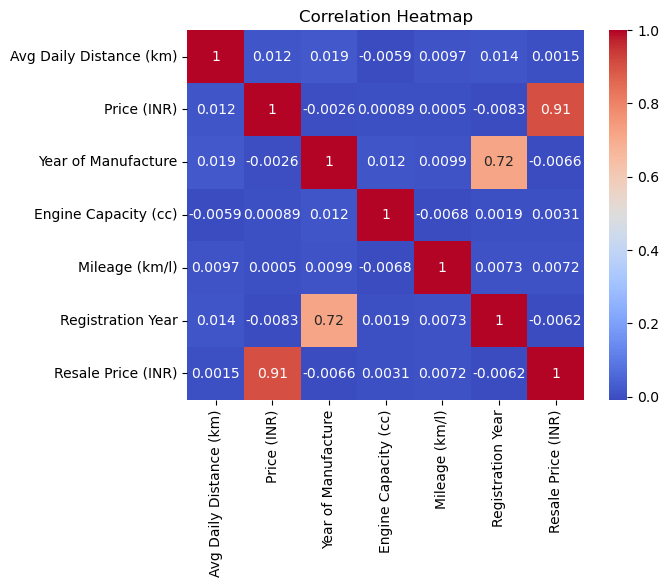

In [ ]:
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:

from sklearn.feature_selection import VarianceThreshold  # ✅ Add this line

# Select numerical columns only
numerical_cols =data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numerical_cols.corr()

# Remove highly correlated features (threshold > 0.9)
correlated_features = set()
threshold = 0.9
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Filter out correlated features
independent_features = [col for col in numerical_cols.columns if col not in correlated_features]

# Apply Variance Threshold to remove low-variance features
selector = VarianceThreshold(threshold=0.01)  # ✅ This will now work
selector.fit(numerical_cols[independent_features])

# Get final independent features
final_independent_features = np.array(independent_features)[selector.get_support()]

# Display results
print("Number of independent features:", len(final_independent_features))
print("Independent features:\n", final_independent_features.tolist())


Number of independent features: 6
Independent features:
 ['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture', 'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year']
